In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving S&P500_prices.csv to S&P500_prices.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['S&P500_prices.csv']))
print(df)

             Date       Close Ticker
0      2024-01-02   91.973244    MMM
1      2024-01-03   90.125420    MMM
2      2024-01-04   90.443146    MMM
3      2024-01-05   90.794312    MMM
4      2024-01-08   91.020065    MMM
...           ...         ...    ...
29824  2024-03-22  168.899994    ZTS
29825  2024-03-25  167.809998    ZTS
29826  2024-03-26  165.669998    ZTS
29827  2024-03-27  168.509995    ZTS
29828  2024-03-28  169.210007    ZTS

[29829 rows x 3 columns]


In [ ]:
df['Date'] = pd.to_datetime(df.Date)
print(df)

            Date       Close Ticker
0     2024-01-02   91.973244    MMM
1     2024-01-03   90.125420    MMM
2     2024-01-04   90.443146    MMM
3     2024-01-05   90.794312    MMM
4     2024-01-08   91.020065    MMM
...          ...         ...    ...
29824 2024-03-22  168.899994    ZTS
29825 2024-03-25  167.809998    ZTS
29826 2024-03-26  165.669998    ZTS
29827 2024-03-27  168.509995    ZTS
29828 2024-03-28  169.210007    ZTS

[29829 rows x 3 columns]


In [ ]:
df = df.sort_values(by=['Ticker', 'Date'], ascending=True)
print(df)

            Date       Close Ticker
610   2024-01-02  138.750000      A
611   2024-01-03  131.160004      A
612   2024-01-04  131.000000      A
613   2024-01-05  130.559998      A
614   2024-01-08  133.380005      A
...          ...         ...    ...
29824 2024-03-22  168.899994    ZTS
29825 2024-03-25  167.809998    ZTS
29826 2024-03-26  165.669998    ZTS
29827 2024-03-27  168.509995    ZTS
29828 2024-03-28  169.210007    ZTS

[29829 rows x 3 columns]


In [ ]:
df['Return'] = df.groupby('Ticker')['Close'].pct_change()*100
print(df)

            Date       Close Ticker    Return
610   2024-01-02  138.750000      A       NaN
611   2024-01-03  131.160004      A -5.470268
612   2024-01-04  131.000000      A -0.121991
613   2024-01-05  130.559998      A -0.335880
614   2024-01-08  133.380005      A  2.159932
...          ...         ...    ...       ...
29824 2024-03-22  168.899994    ZTS  0.344574
29825 2024-03-25  167.809998    ZTS -0.645350
29826 2024-03-26  165.669998    ZTS -1.275251
29827 2024-03-27  168.509995    ZTS  1.714249
29828 2024-03-28  169.210007    ZTS  0.415413

[29829 rows x 4 columns]


In [ ]:
df.fillna(0, inplace=True)
print(df)

            Date       Close Ticker    Return
610   2024-01-02  138.750000      A  0.000000
611   2024-01-03  131.160004      A -5.470268
612   2024-01-04  131.000000      A -0.121991
613   2024-01-05  130.559998      A -0.335880
614   2024-01-08  133.380005      A  2.159932
...          ...         ...    ...       ...
29824 2024-03-22  168.899994    ZTS  0.344574
29825 2024-03-25  167.809998    ZTS -0.645350
29826 2024-03-26  165.669998    ZTS -1.275251
29827 2024-03-27  168.509995    ZTS  1.714249
29828 2024-03-28  169.210007    ZTS  0.415413

[29829 rows x 4 columns]


In [ ]:
std_df = df.groupby('Ticker')['Return'].std()
print(std_df)

Ticker
A       1.561118
AAL     2.882006
AAP     2.109418
AAPL    1.247127
ABT     1.126944
          ...   
YUM     0.887501
ZBH     1.224122
ZBRA    2.613134
ZION    2.379044
ZTS     1.673779
Name: Return, Length: 489, dtype: float64


In [ ]:
range_df = df.groupby('Ticker')['Return'].max()
range_df -= df.groupby('Ticker')['Return'].min()
print(range_df)

Ticker
A        8.835029
AAL     19.724143
AAP     11.464262
AAPL     7.342815
ABT      5.140149
          ...    
YUM      4.013585
ZBH      7.242758
ZBRA    17.940971
ZION    11.083029
ZTS     11.106437
Name: Return, Length: 489, dtype: float64


In [76]:
metrics_df = pd.concat([std_df, range_df], axis=1)
metrics_df.columns = ["SD", "Range"]
print(metrics_df)

              SD      Range
Ticker                     
A       1.561118   8.835029
AAL     2.882006  19.724143
AAP     2.109418  11.464262
AAPL    1.247127   7.342815
ABT     1.126944   5.140149
...          ...        ...
YUM     0.887501   4.013585
ZBH     1.224122   7.242758
ZBRA    2.613134  17.940971
ZION    2.379044  11.083029
ZTS     1.673779  11.106437

[489 rows x 2 columns]


In [78]:
print(metrics_df.head())

              SD      Range
Ticker                     
A       1.561118   8.835029
AAL     2.882006  19.724143
AAP     2.109418  11.464262
AAPL    1.247127   7.342815
ABT     1.126944   5.140149


In [81]:
metrics_df = metrics_df.drop(index=metrics_df.index[0])
print(metrics_df)

              SD      Range
Ticker                     
AAPL    1.247127   7.342815
ABT     1.126944   5.140149
ACGL    1.061113   5.048190
ACN     1.735392  12.189248
ADBE    2.625738  18.017196
...          ...        ...
YUM     0.887501   4.013585
ZBH     1.224122   7.242758
ZBRA    2.613134  17.940971
ZION    2.379044  11.083029
ZTS     1.673779  11.106437

[486 rows x 2 columns]


In [84]:
# Min-Max Normalization
df_norm = (metrics_df-metrics_df.min())/(metrics_df.max()-metrics_df.min())
print(df_norm)

              SD     Range
Ticker                    
AAPL    0.168599  0.160881
ABT     0.137849  0.078392
ACGL    0.121006  0.074948
ACN     0.293524  0.342378
ADBE    0.521325  0.560632
...          ...       ...
YUM     0.076586  0.036202
ZBH     0.162713  0.157134
ZBRA    0.518100  0.557777
ZION    0.458207  0.300950
ZTS     0.277760  0.301827

[486 rows x 2 columns]


In [86]:
from matplotlib import pyplot as plt


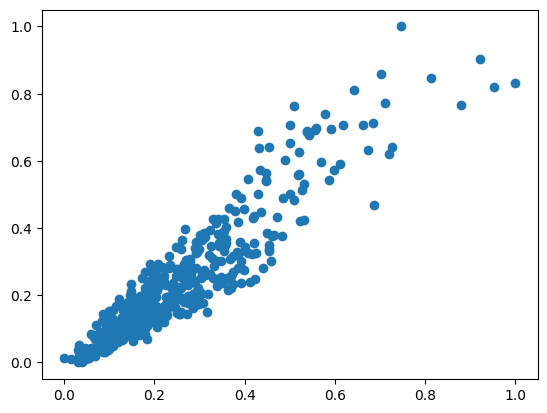

In [88]:
X = np.array(df_norm['SD'])
Y = np.array(df_norm['Range'])
plt.scatter(X, Y)

In [89]:
from sklearn.cluster import KMeans

In [95]:
k=3
k_means = KMeans(n_clusters=k)
clusters = k_means.fit_predict(df_norm)
metrics_df['Cluster'] = clusters
Y = np.array(metrics_df['Cluster'])
print(metrics_df)


              SD      Range  Cluster
Ticker                              
AAPL    1.247127   7.342815        1
ABT     1.126944   5.140149        1
ACGL    1.061113   5.048190        1
ACN     1.735392  12.189248        0
ADBE    2.625738  18.017196        2
...          ...        ...      ...
YUM     0.887501   4.013585        1
ZBH     1.224122   7.242758        1
ZBRA    2.613134  17.940971        2
ZION    2.379044  11.083029        0
ZTS     1.673779  11.106437        0

[486 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


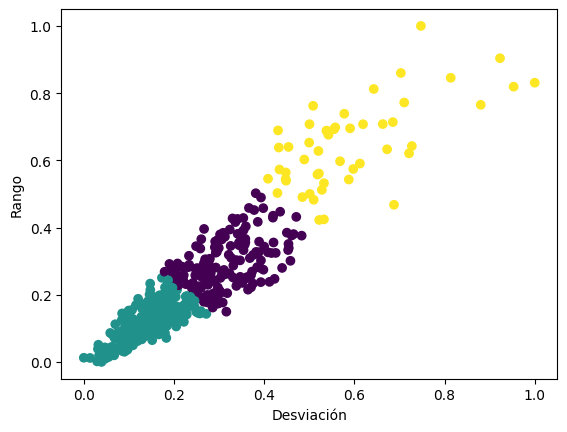

In [103]:
X = np.array(df_norm)
Y = np.array(metrics_df['Cluster'])
plt.xlabel(
    "Desviación",
    size=10,
)
plt.ylabel(
    "Rango",
    size=10,
)
plt.scatter(X[:,0], X[:,1], c=Y)

**Conclusiones: **El ejercicio muestra una tarea de clasifición para las acciones listadas en el listado S&P500 publicado en Yahoo.com, realizado con las métricas de la desviación estándar y el rango de variación del precio de cierre de las acciones, visto en los tre prieros meses del año 2024.

Como se puede ver en la gráfica final, el resultado de la ejecución fue el de generar tres clusters, que agrupan las acciones en las del grupo de abajo a la izquierda que pueden ser clasificados más estables o de menos volatilidad ya que sus métricas de variación están más orientadas al cero.

En el grupo púrpura, en la mitad de la gráfica pueden identificarse las acciones con una volatilidad moderada, y en el cluster amarillo, las acciones de más alta volatilidad según los datos analizados.

Esta información puede ser de utilidad para que un inversionista realice toma de decisiones para nuevas actividades de inversión.
